In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import joblib
import gc
import warnings
import sys
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers
import math
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from sklearn.tree import DecisionTreeClassifier
from joblib import parallel_backend
import dill
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import SMOTE
import pickle
from sklearn.metrics import confusion_matrix
sb.set()

In [426]:
time_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_1.csv")
freq_1=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_1.csv")

combined_1 = pd.concat([time_1, freq_1], axis=1)
combined_1=combined_1[combined_1['0']!=2]
combined_1.dropna(inplace=True)
combined_1

,0,skew_A_F,sma_A_F,wl_A_F,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,...,dom_freq_T_L,PSD_A_F,PSD_A_V,PSD_A_L,PSD_L_F,PSD_L_V,PSD_L_L,PSD_T_F,PSD_T_V,PSD_T_L
0,0,1.130584,3716,1366,-50.875000,90,-121,1613.078125,40.163144,64.817773,...,4.0,1854.788456,227.836651,379.686601,3673.529083,139.264478,313.081705,953.540753,212.153089,384.651253
1,0,0.158943,3296,1559,-49.000000,40,-121,1248.468750,35.333677,60.410833,...,7.0,1282.670682,204.327587,358.653234,5870.679225,272.111015,342.383179,733.792408,401.868267,407.636343
2,0,1.256016,3340,720,-48.437500,50,-90,763.183594,27.625778,55.761770,...,5.0,257.464603,135.222921,344.399784,1593.052656,149.626994,400.214035,390.962943,472.885439,583.876629
3,0,-0.293295,3533,1254,-52.390625,40,-161,1289.019287,35.902915,63.512179,...,7.0,2156.327939,409.940992,912.396549,11391.062731,245.406429,933.590298,1534.600843,394.170673,579.901794
4,0,-0.251971,3794,1358,-58.656250,20,-141,675.444336,25.989312,64.156060,...,3.0,561.597654,356.496866,267.717551,1492.351960,206.829395,307.172887,339.481948,300.569947,453.666990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10853,1,2.099177,23498,14054,242.250000,2848,-1181,327142.093750,571.963367,621.149866,...,2.0,766502.316619,129043.030683,184031.910153,204904.133520,10891.990749,63944.053782,15106.186009,21151.398069,8098.965874
10854,1,2.052090,27595,12387,334.640625,2616,-939,300198.136475,547.903401,642.014396,...,5.0,26201.869757,32811.957081,13942.368304,66139.508053,3418.242307,45770.819907,6487.147146,7302.111771,2691.128789
10855,1,1.817856,35735,23839,373.515625,3616,-1757,650379.812256,806.461290,888.759661,...,5.0,325230.576289,147032.257175,54806.875673,115368.143220,4700.469142,79580.921943,8572.526946,7563.168185,2745.258900
10856,1,1.921319,39797,29588,402.265625,4111,-1747,902242.913818,949.864682,1031.533105,...,5.0,396117.840610,174072.103776,57710.329744,139959.987884,9601.566468,67679.878552,11873.188344,4801.245306,6055.613588


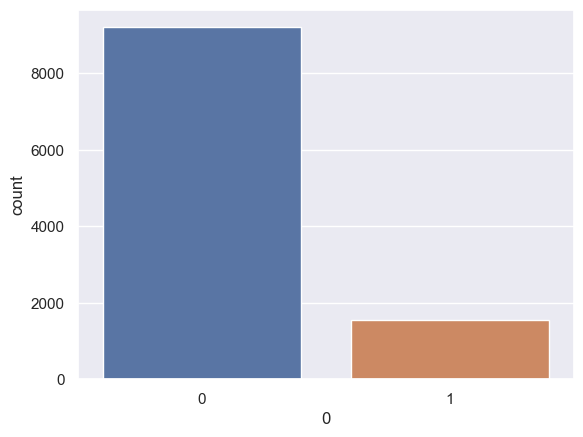

In [427]:
X = combined_1.drop('0', axis=1)
y = combined_1['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [428]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

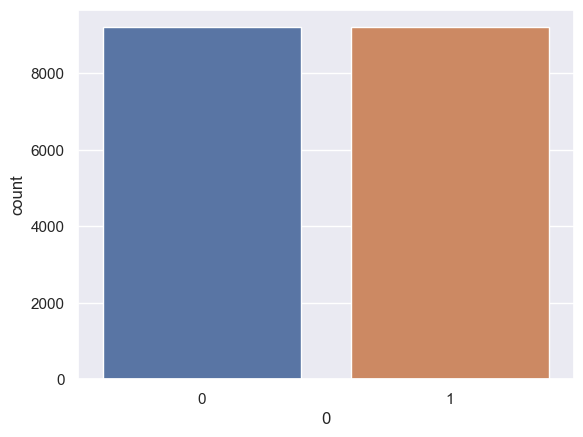

In [429]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [430]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [431]:
def getsize(model):
  p = pickle.dumps(model)
  return sys.getsizeof(p)

In [434]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [100, 200, 250, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2 ,5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = HalvingGridSearchCV(rf, params, scoring='f1', n_jobs=-1, verbose=2)

search.fit(X, y)

best_params = search.best_params_
best_estimator = search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 227
max_resources_: 18410
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 227
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
----------
iter: 1
n_candidates: 72
n_resources: 681
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 2
n_candidates: 24
n_resources: 2043
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 3
n_candidates: 8
n_resources: 6129
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 4
n_candidates: 3
n_resources: 18387
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator found:  RandomForestClassifier(max_features='log2', random_state=42)


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


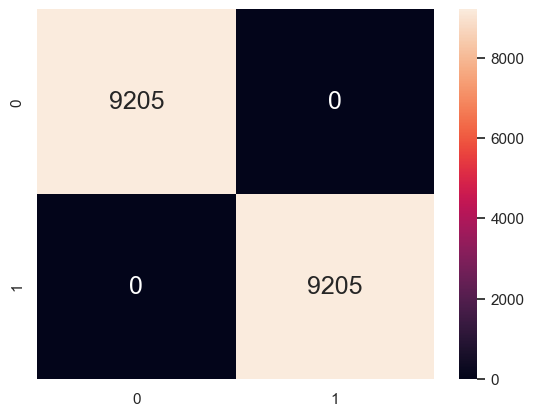

In [435]:
rf_y_pred = search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, rf_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, rf_y_pred))
print('Precision:', precision_score(y, rf_y_pred))
print('Recall:', recall_score(y, rf_y_pred))
print('F1-Score:', f1_score(y, rf_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

sb.heatmap(confusion_matrix(y, rf_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [436]:
getsize(search)

11359618

In [437]:
joblib.dump(search, r"C:\Users\Admin\Desktop\Models\rf_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\rf_new_model.joblib']

In [438]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 681
max_resources_: 18410
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 681
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 2043
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 6129
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 18387
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best estimator found:  DecisionTreeClassifier(max_depth=10, min_samples_split=10)


For Training Data:
Accuracy: 0.951548071700163
Precision: 0.924956548410183
Recall: 0.9828354155350353
F1-Score: 0.953018013272938
Sensitivity: 0.9828354155350353
Specificity: 0.9202607278652906


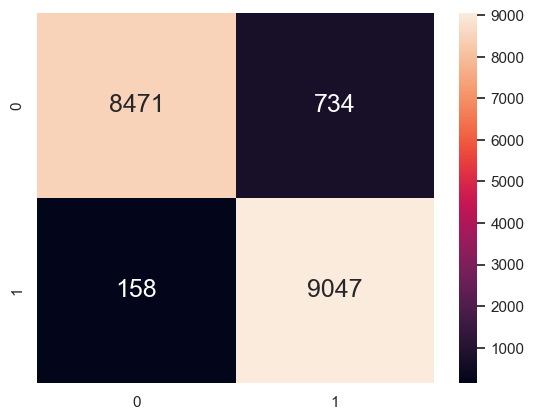

In [439]:
dt_y_pred = grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, dt_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, dt_y_pred))
print('Precision:', precision_score(y, dt_y_pred))
print('Recall:', recall_score(y, dt_y_pred))
print('F1-Score:', f1_score(y, dt_y_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

sb.heatmap(confusion_matrix(y, dt_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [440]:
getsize(grid_search)

47611

In [441]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\dt_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\dt_new_model.joblib']

In [442]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [10, 12, 14, 16, 18, 20, 25, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X, y)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 25
max_resources_: 18410
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 1080
n_resources: 25
Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
----------
iter: 1
n_candidates: 360
n_resources: 75
Fitting 5 folds for each of 360 candidates, totalling 1800 fits
----------
iter: 2
n_candidates: 120
n_resources: 225
Fitting 5 folds for each of 120 candidates, totalling 600 fits
----------
iter: 3
n_candidates: 40
n_resources: 675
Fitting 5 folds for each of 40 candidates, totalling 200 fits
----------
iter: 4
n_candidates: 14
n_resources: 2025
Fitting 5 folds for each of 14 candidates, totalling 70 fits
----------
iter: 5
n_candidates: 5
n_resources: 6075
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 6
n_candidates: 2
n_resources: 18225
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.5, 

For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


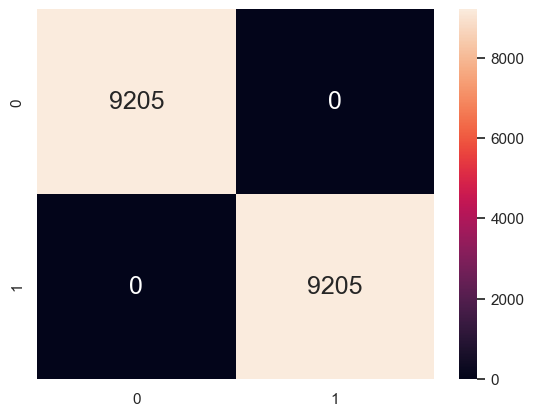

In [443]:
lgbm_y_pred = best_lgm_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, lgbm_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, lgbm_y_pred))
print('Precision:', precision_score(y, lgbm_y_pred))
print('Recall:', recall_score(y, lgbm_y_pred))
print('F1-Score:', f1_score(y, lgbm_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, lgbm_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [444]:
getsize(best_lgm_model)

1451765

In [445]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\lgm_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\lgm_new_model.joblib']

In [447]:
xgb = XGBClassifier(eval_metric='mlogloss')

parameters = {
    'n_estimators': [100, 200, 250, 300],
    'max_depth': [10, 20, 25, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.6, 0.8, 1],
#    'min_child_weight': [1, 5, 10],
#    'gamma': [0.5, 1, 1.5],
#    'reg_alpha': [0.1, 0.5, 1],
#    'reg_lambda': [0.1, 0.5, 1]
}

hgs = HalvingGridSearchCV(xgb, parameters, cv=5, scoring='f1', verbose=2, n_jobs=-1)

best_model = hgs.fit(X, y)

print('Best parameters:', best_model.best_params_)

n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 6
min_resources_: 75
max_resources_: 18410
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 432
n_resources: 75
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
----------
iter: 1
n_candidates: 144
n_resources: 225
Fitting 5 folds for each of 144 candidates, totalling 720 fits
----------
iter: 2
n_candidates: 48
n_resources: 675
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------
iter: 3
n_candidates: 16
n_resources: 2025
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 4
n_candidates: 6
n_resources: 6075
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 5
n_candidates: 2
n_resources: 18225
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.5}


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


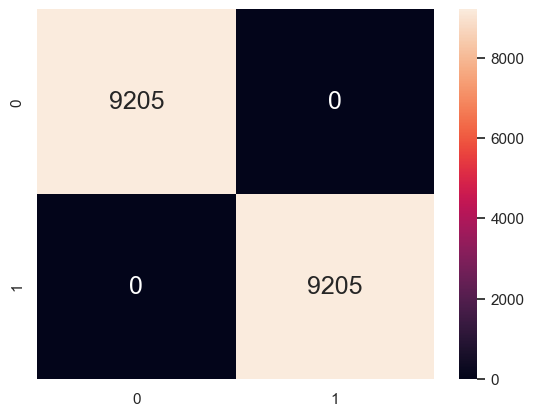

In [448]:
xgb_y_pred = best_model.predict(X)

tn, fp, fn, tp = confusion_matrix(y, xgb_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, xgb_y_pred))
print('Precision:', precision_score(y, xgb_y_pred))
print('Recall:', recall_score(y, xgb_y_pred))
print('F1-Score:', f1_score(y, xgb_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, xgb_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [449]:
getsize(best_model)

943881

In [450]:
joblib.dump(best_model, r"C:\Users\Admin\Desktop\Models\xgb_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\xgb_new_model.joblib']

In [471]:
best_xgb = best_model.best_estimator_

importances = best_xgb.feature_importances_

features=[i for i in combined_1.drop(columns=['0']).columns]

feature_importances = pd.DataFrame(importances, index = features, columns=['importance']).sort_values('importance', ascending=True)

for row in feature_importances.iterrows():
    if 'cov' in row[1].name:
        print(row)

('cov_L_L_A_V', importance    0.000075
Name: cov_L_L_A_V, dtype: float32)
('cov_T_L_L_L', importance    0.000129
Name: cov_T_L_L_L, dtype: float32)
('cov_L_F_A_V', importance    0.000133
Name: cov_L_F_A_V, dtype: float32)
('cov_T_F_L_V', importance    0.000133
Name: cov_T_F_L_V, dtype: float32)
('cov_A_V_A_F', importance    0.000155
Name: cov_A_V_A_F, dtype: float32)
('cov_L_L_A_F', importance    0.000223
Name: cov_L_L_A_F, dtype: float32)
('cov_T_L_A_L', importance    0.000245
Name: cov_T_L_A_L, dtype: float32)
('cov_T_V_L_F', importance    0.000336
Name: cov_T_V_L_F, dtype: float32)
('cov_A_L_A_V', importance    0.000342
Name: cov_A_L_A_V, dtype: float32)
('cov_A_V_A_L', importance    0.000369
Name: cov_A_V_A_L, dtype: float32)
('cov_T_F_A_V', importance    0.00039
Name: cov_T_F_A_V, dtype: float32)
('cov_T_V_A_F', importance    0.000431
Name: cov_T_V_A_F, dtype: float32)
('cov_A_V_T_L', importance    0.000441
Name: cov_A_V_T_L, dtype: float32)
('cov_L_L_T_L', importance    0.000476


In [463]:
features=[i for i in combined_1.drop(columns=['0']).columns]
len(features)

480

In [366]:
svc = SVC()

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

halving_grid_search = HalvingGridSearchCV(estimator = svc, param_grid = param_grid, cv = 3, verbose=2, n_jobs=-1)

halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 2045
max_resources_: 18408
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 25
n_resources: 2045
Fitting 3 folds for each of 25 candidates, totalling 75 fits
----------
iter: 1
n_candidates: 9
n_resources: 6135
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 2
n_candidates: 3
n_resources: 18405
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters found:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best score found:  0.8748709589785384


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


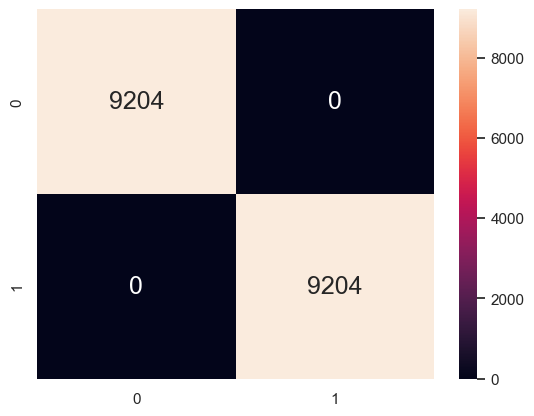

In [367]:
svc_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, svc_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, svc_y_pred))
print('Precision:', precision_score(y, svc_y_pred))
print('Recall:', recall_score(y, svc_y_pred))
print('F1-Score:', f1_score(y, svc_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, svc_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [368]:
getsize(halving_grid_search)

30271295

In [369]:
joblib.dump(halving_grid_search, r"C:\Users\Admin\Desktop\Models\svc_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\svc_new_model.joblib']

In [371]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': list(range(1, 31)),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

halving_grid_search = HalvingGridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, verbose=2, n_jobs=-1)

# Fit the halving grid search model
halving_grid_search.fit(X, y)

print("Best parameters found: ", halving_grid_search.best_params_)
print("Best score found: ", halving_grid_search.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 227
max_resources_: 18408
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 120
n_resources: 227
Fitting 3 folds for each of 120 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 40
n_resources: 681
Fitting 3 folds for each of 40 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 14
n_resources: 2043
Fitting 3 folds for each of 14 candidates, totalling 42 fits
----------
iter: 3
n_candidates: 5
n_resources: 6129
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 18387
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'distance'}
Best score found:  0.7543916897808235


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0


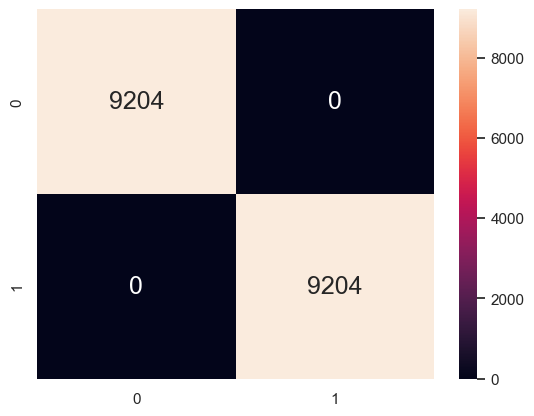

In [372]:
knn_y_pred = halving_grid_search.predict(X)

tn, fp, fn, tp = confusion_matrix(y, knn_y_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y, knn_y_pred))
print('Precision:', precision_score(y, knn_y_pred))
print('Recall:', recall_score(y, knn_y_pred))
print('F1-Score:', f1_score(y, knn_y_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")


sb.heatmap(confusion_matrix(y, knn_y_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

plt.show()

In [373]:
getsize(halving_grid_search)

86694106

In [374]:
joblib.dump(halving_grid_search, r"C:\Users\Admin\Desktop\Models\knn_new_model.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\knn_new_model.joblib']

In [181]:
time_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_2.csv")
freq_2=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_2.csv")

combined_2 = pd.concat([time_2, freq_2], axis=1)
combined_2=combined_2[combined_2['0']!=2]
combined_2

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,mean_A_V,...,ENt_T_L,peak_A_F,peak_A_V,peak_A_L,peak_L_F,peak_L_V,peak_L_L,peak_T_F,peak_T_V,peak_T_L
0,0,-49.937500,90,-121,1431.652344,37.837182,62.653063,54.781250,5.0,991.343750,...,3.602805,327.569598,20.850887,47.811692,2020.487880,27.868029,45.139079,235.146453,35.549430,42.494938
1,0,-50.414062,50,-161,1030.008240,32.093741,59.762747,53.695312,3.0,988.671875,...,3.429171,213.600991,21.410458,124.100293,1377.358497,27.845124,173.345109,197.471772,121.725026,70.643617
2,0,-60.570312,20,-151,809.463806,28.451077,66.919553,61.351562,3.0,988.843750,...,3.366400,118.031098,32.913827,55.573633,674.884835,19.631668,88.105798,122.499113,91.191968,84.979903
3,0,-67.843750,30,-131,731.397461,27.044361,73.035415,68.468750,1.5,991.835938,...,3.643843,59.043332,32.729313,32.933788,275.422038,18.240468,98.009174,79.247872,132.186151,46.149930
4,0,-80.234375,20,-181,1246.663818,35.308127,87.659676,80.546875,1.0,998.046875,...,3.617120,378.385202,40.462247,67.508569,2351.777777,70.723049,96.558849,161.447589,205.563624,45.218635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12302,1,206.671875,2959,-393,109801.861084,331.363639,390.531849,244.609375,3.0,1010.992188,...,3.539316,9851.707767,4584.891503,2268.987771,7408.186195,1164.301992,3241.462645,1120.540616,1515.304314,784.268535
12303,1,219.843750,3212,-353,86467.006836,294.052728,367.148854,245.046875,3.0,1008.695312,...,3.285059,3314.800974,2234.772459,1853.186185,3032.215698,1182.910788,7401.088782,331.207832,1799.829367,776.181708
12304,1,288.445312,2848,-1181,315804.122009,561.964520,631.668283,399.164062,5.0,1008.710938,...,3.617898,30994.578730,15757.448224,5795.273429,11981.424578,1228.404778,9253.998804,1412.465284,1253.854232,386.464462
12305,1,387.890625,4111,-1757,776518.003662,881.202589,962.796521,590.093750,8.0,971.226562,...,3.561716,75369.573762,26218.966974,12289.129964,20813.717495,1199.239109,15309.744441,1591.828758,1527.442709,527.513104


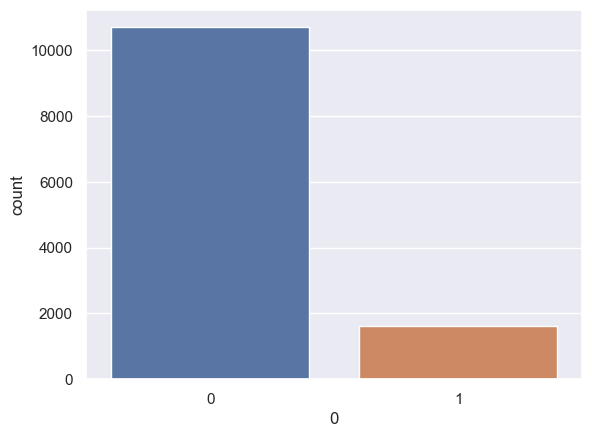

In [182]:
X = combined_2.drop('0', axis=1)
y = combined_2['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [183]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

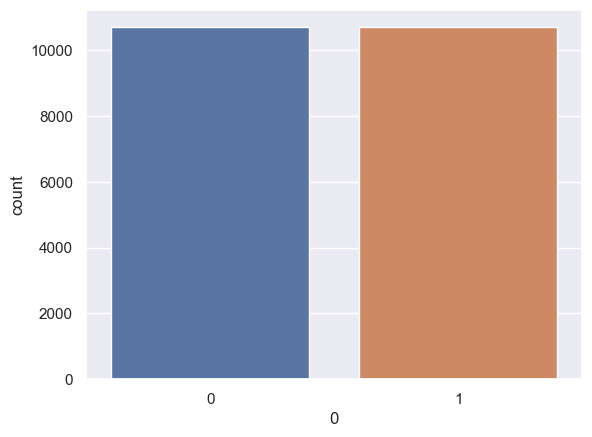

In [184]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [185]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [187]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [50 ,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2 ,5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = HalvingGridSearchCV(rf, params, scoring='f1', n_jobs=-1, verbose=2)

search.fit(X_train, y_train)

best_params = search.best_params_
best_estimator = search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 184
max_resources_: 14970
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 184
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 552
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1656
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 4968
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 14904
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best estimator found:  RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)


For Training Data:
Accuracy: 0.9999331997327989
Precision: 0.9998664886515354
Recall: 1.0
F1-Score: 0.9999332398691502
Sensitivity: 1.0
Specificity: 0.9998663280310119

For Test Data:
Accuracy: 0.9808291770573566
Precision: 0.9672429481346679
Recall: 0.9953183520599251
F1-Score: 0.981079833871712
Sensitivity: 0.9953183520599251
Specificity: 0.9663760896637609


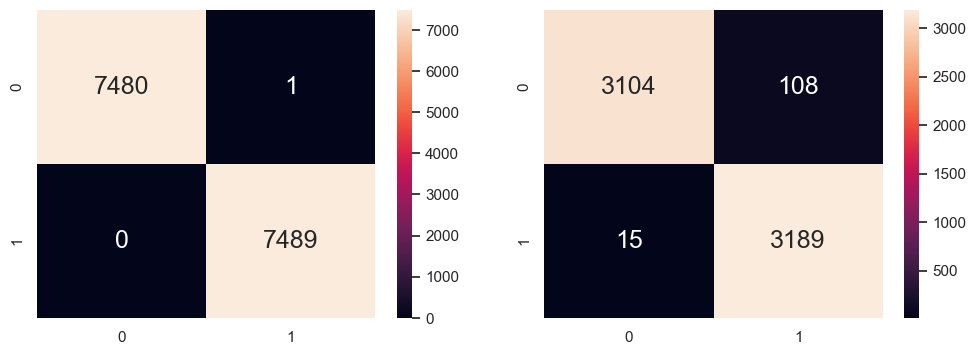

In [188]:
rf_y_train_pred = search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, rf_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, rf_y_train_pred))
print('Precision:', precision_score(y_train, rf_y_train_pred))
print('Recall:', recall_score(y_train, rf_y_train_pred))
print('F1-Score:', f1_score(y_train, rf_y_train_pred))

rf_train_acc=accuracy_score(y_train, rf_y_train_pred)
rf_train_pre=precision_score(y_train, rf_y_train_pred)
rf_train_rec=recall_score(y_train, rf_y_train_pred)
rf_train_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()


rf_y_test_pred = search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rf_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred))
print('Recall:', recall_score(y_test, rf_y_test_pred))
print('F1-Score:', f1_score(y_test, rf_y_test_pred))

rf_test_acc=accuracy_score(y_train, rf_y_train_pred)
rf_test_pre=precision_score(y_train, rf_y_train_pred)
rf_test_rec=recall_score(y_train, rf_y_train_pred)
rf_test_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [189]:
getsize(search)

13885896

In [46]:
joblib.dump(search, r"C:\Users\Admin\Desktop\Models\rf_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\rf_new_model_1.joblib']

In [190]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 554
max_resources_: 14970
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 554
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 1662
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 4986
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 14958
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier(max_depth=50)


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9555798004987531
Precision: 0.9459211732355637
Recall: 0.9662921348314607
F1-Score: 0.9559981472904122
Sensitivity: 0.9662921348314607
Specificity: 0.9448941469489415



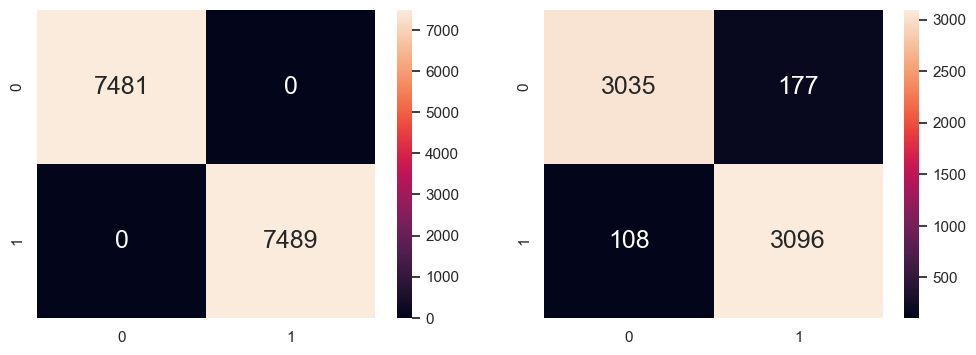

In [191]:
dt_y_train_pred = grid_search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, dt_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, dt_y_train_pred))
print('Precision:', precision_score(y_train, dt_y_train_pred))
print('Recall:', recall_score(y_train, dt_y_train_pred))
print('F1-Score:', f1_score(y_train, dt_y_train_pred))

rf_train_acc=accuracy_score(y_train, dt_y_train_pred)
rf_train_pre=precision_score(y_train, dt_y_train_pred)
rf_train_rec=recall_score(y_train, dt_y_train_pred)
rf_train_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

dt_y_test_pred = grid_search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, dt_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, dt_y_test_pred))
print('Precision:', precision_score(y_test, dt_y_test_pred))
print('Recall:', recall_score(y_test, dt_y_test_pred))
print('F1-Score:', f1_score(y_test, dt_y_test_pred))

rf_test_acc=accuracy_score(y_train, dt_y_train_pred)
rf_test_pre=precision_score(y_train, dt_y_train_pred)
rf_test_rec=recall_score(y_train, dt_y_train_pred)
rf_test_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [192]:
getsize(grid_search)

92258

In [50]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\dt_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\dt_new_model_1.joblib']

In [193]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 14970
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 972
n_resources: 20
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
----------
iter: 1
n_candidates: 324
n_resources: 60
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
----------
iter: 2
n_candidates: 108
n_resources: 180
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 3
n_candidates: 36
n_resources: 540
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 4
n_candidates: 12
n_resources: 1620
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 14580
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.5, 'l

For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9867518703241895
Precision: 0.9788148603008904
Recall: 0.9950062421972534
F1-Score: 0.9868441417737193
Sensitivity: 0.9950062421972534
Specificity: 0.9785180572851806



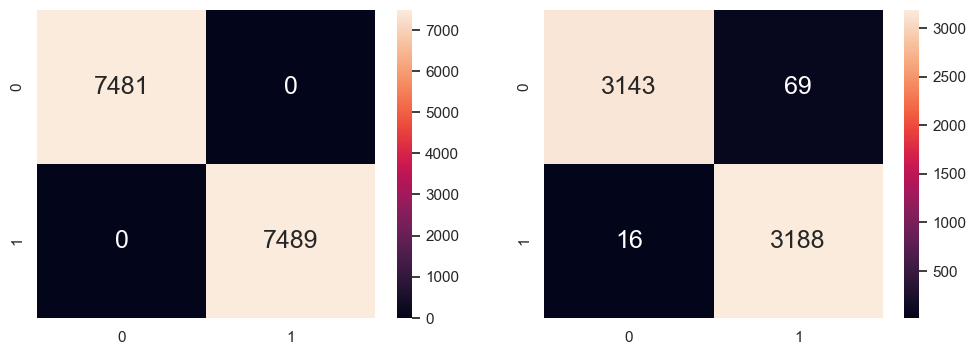

In [194]:
lgbm_y_train_pred = best_lgm_model.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, lgbm_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, lgbm_y_train_pred))
print('Precision:', precision_score(y_train, lgbm_y_train_pred))
print('Recall:', recall_score(y_train, lgbm_y_train_pred))
print('F1-Score:', f1_score(y_train, lgbm_y_train_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

lgbm_y_test_pred = best_lgm_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, lgbm_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, lgbm_y_test_pred))
print('Precision:', precision_score(y_test, lgbm_y_test_pred))
print('Recall:', recall_score(y_test, lgbm_y_test_pred))
print('F1-Score:', f1_score(y_test, lgbm_y_test_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, lgbm_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, lgbm_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [195]:
getsize(best_lgm_model)

1037184

In [54]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\lgm_new_model_1.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\lgm_new_model_1.joblib']

In [196]:
time_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_3.csv")
freq_3=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_3.csv")

combined_3 = pd.concat([time_3, freq_3], axis=1)
combined_3=combined_3[combined_3['0']!=2]
combined_3

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,mean_A_V,...,ENt_T_L,peak_A_F,peak_A_V,peak_A_L,peak_L_F,peak_L_V,peak_L_L,peak_T_F,peak_T_V,peak_T_L
0,0,-49.437500,90,-121,1209.329427,34.775414,60.443327,53.916667,6.0,990.458333,...,3.819263,141.948572,13.792857,26.171435,749.930172,16.890708,61.422852,260.627114,68.801104,62.384485
1,0,-57.843750,40,-161,984.183919,31.371706,65.803369,59.302083,5.0,988.781250,...,3.459852,164.847917,23.190526,33.655045,779.521495,16.206574,108.973316,167.405506,41.515047,179.214669
2,0,-72.317708,30,-141,811.893853,28.493751,77.728661,72.734375,1.5,993.682292,...,4.050899,106.326204,22.060853,45.152215,518.101392,18.056391,150.598668,103.109420,122.795175,33.944962
3,0,-83.692708,20,-181,1380.889947,37.160328,91.571608,84.109375,2.0,996.994792,...,4.043216,330.959751,40.485469,65.766823,1997.268258,36.677652,109.450376,133.776668,212.974669,31.240868
4,0,-90.442708,-20,-151,598.267551,24.459508,93.691787,90.442708,0.0,987.333333,...,3.910734,62.259697,25.661317,238.244021,318.082793,14.681500,142.791514,299.366147,91.185023,50.901534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12189,1,257.619792,3242,-1959,315745.475233,561.912338,618.153243,365.578125,10.0,981.718750,...,4.130366,18301.454676,13421.667520,6374.723377,16590.966487,1167.060450,6998.161427,1677.446442,2086.869153,280.728832
12190,1,214.968750,4000,-2151,256264.957357,506.226192,549.978655,301.114583,6.0,1018.072917,...,3.479318,13722.116685,6062.055629,4133.314514,6321.010681,492.768662,4069.769071,1282.521544,1485.256046,422.185834
12191,1,222.692708,3212,-353,59900.160780,244.745093,330.896061,239.598958,4.0,1009.125000,...,3.869126,1978.815835,1380.624668,1204.354784,3030.724985,1277.199674,6402.225157,438.110384,1894.643442,404.617678
12192,1,316.802083,3616,-1757,428937.564996,654.933252,727.530841,452.229167,9.0,993.463542,...,3.941674,34657.011585,11215.685839,9194.513750,14509.265658,764.670363,9620.170383,879.302228,1247.293562,325.672716


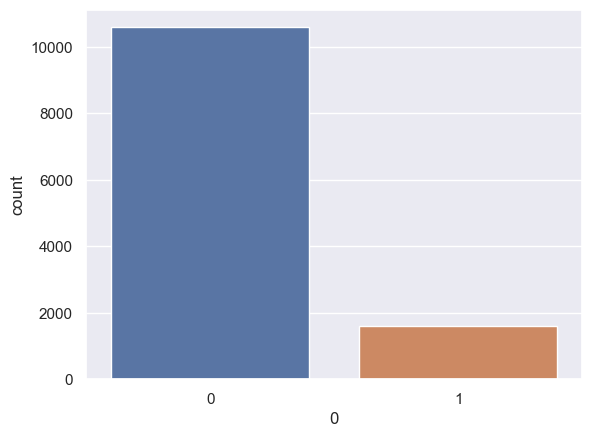

In [197]:
X = combined_3.drop('0', axis=1)
y = combined_3['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [198]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

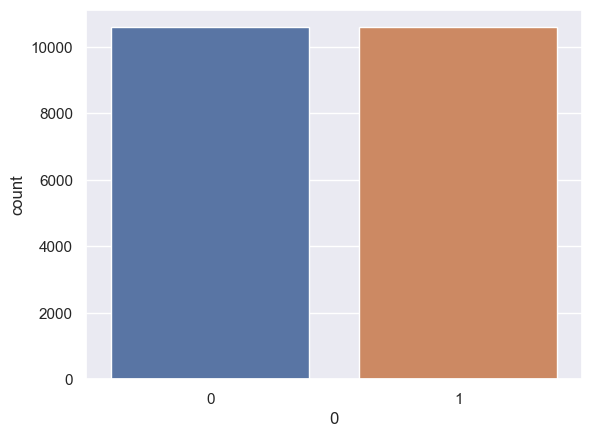

In [199]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [200]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [202]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [50 ,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2 ,5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = HalvingGridSearchCV(rf, params, scoring='f1', n_jobs=-1, verbose=2)

search.fit(X_train, y_train)

best_params = search.best_params_
best_estimator = search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 182
max_resources_: 14821
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 182
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 546
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1638
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 4914
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 14742
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator found:  RandomForestClassifier(random_state=42)


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9916574846529199
Precision: 0.9843112645120803
Recall: 0.9990445859872611
F1-Score: 0.9916232021495179
Sensitivity: 0.9990445859872611
Specificity: 0.9844382197323374


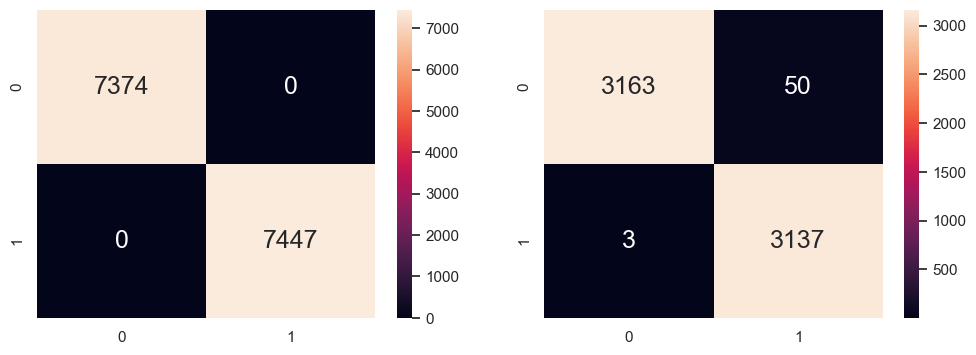

In [203]:
rf_y_train_pred = search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, rf_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, rf_y_train_pred))
print('Precision:', precision_score(y_train, rf_y_train_pred))
print('Recall:', recall_score(y_train, rf_y_train_pred))
print('F1-Score:', f1_score(y_train, rf_y_train_pred))

rf_train_acc=accuracy_score(y_train, rf_y_train_pred)
rf_train_pre=precision_score(y_train, rf_y_train_pred)
rf_train_rec=recall_score(y_train, rf_y_train_pred)
rf_train_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()


rf_y_test_pred = search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rf_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred))
print('Recall:', recall_score(y_test, rf_y_test_pred))
print('F1-Score:', f1_score(y_test, rf_y_test_pred))

rf_test_acc=accuracy_score(y_train, rf_y_train_pred)
rf_test_pre=precision_score(y_train, rf_y_train_pred)
rf_test_rec=recall_score(y_train, rf_y_train_pred)
rf_test_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [204]:
getsize(search)

5276875

In [64]:
joblib.dump(search, r"C:\Users\Admin\Desktop\Models\rf_new_model_2.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\rf_new_model_2.joblib']

In [205]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 548
max_resources_: 14821
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 548
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 1644
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 4932
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 14796
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier(criterion='entropy')


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9785927908074925
Precision: 0.9711417816813049
Recall: 0.9859872611464968
F1-Score: 0.9785082174462705
Sensitivity: 0.9859872611464968
Specificity: 0.9713663243075008



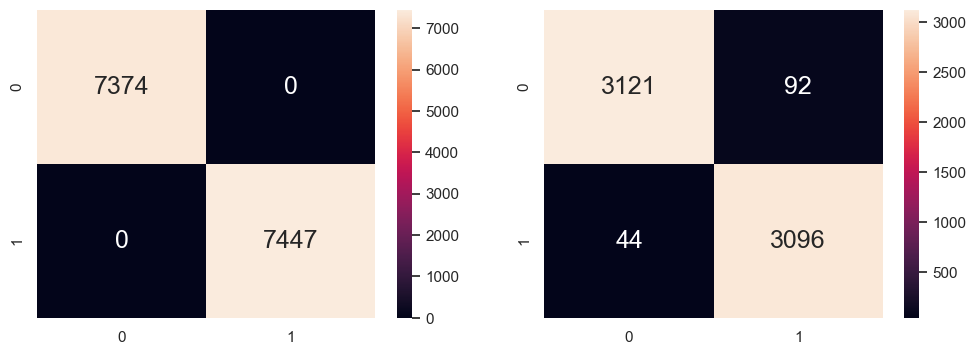

In [206]:
dt_y_train_pred = grid_search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, dt_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, dt_y_train_pred))
print('Precision:', precision_score(y_train, dt_y_train_pred))
print('Recall:', recall_score(y_train, dt_y_train_pred))
print('F1-Score:', f1_score(y_train, dt_y_train_pred))

rf_train_acc=accuracy_score(y_train, dt_y_train_pred)
rf_train_pre=precision_score(y_train, dt_y_train_pred)
rf_train_rec=recall_score(y_train, dt_y_train_pred)
rf_train_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

dt_y_test_pred = grid_search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, dt_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, dt_y_test_pred))
print('Precision:', precision_score(y_test, dt_y_test_pred))
print('Recall:', recall_score(y_test, dt_y_test_pred))
print('F1-Score:', f1_score(y_test, dt_y_test_pred))

rf_test_acc=accuracy_score(y_train, dt_y_train_pred)
rf_test_pre=precision_score(y_train, dt_y_train_pred)
rf_test_rec=recall_score(y_train, dt_y_train_pred)
rf_test_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [207]:
getsize(grid_search)

56243

In [68]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\dt_new_model_2.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\dt_new_model_2.joblib']

In [208]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 14821
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 972
n_resources: 20
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
----------
iter: 1
n_candidates: 324
n_resources: 60
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
----------
iter: 2
n_candidates: 108
n_resources: 180
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 3
n_candidates: 36
n_resources: 540
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 4
n_candidates: 12
n_resources: 1620
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 14580
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.5, 'l

For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9935463560522588
Precision: 0.9880314960629921
Recall: 0.9990445859872611
F1-Score: 0.993507521773555
Sensitivity: 0.9990445859872611
Specificity: 0.9881730469965764



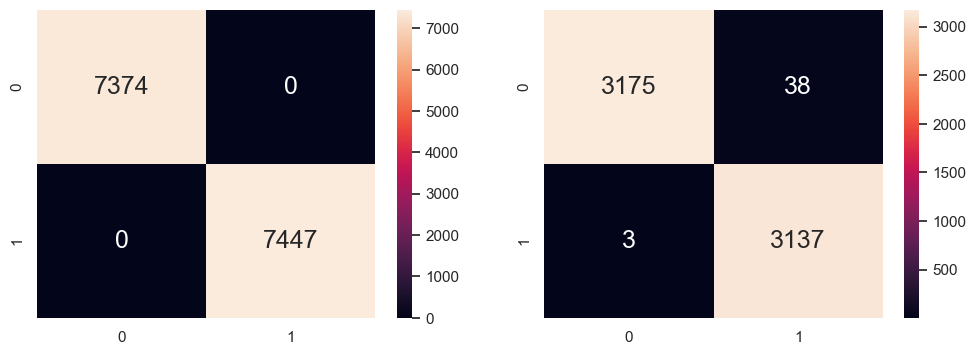

In [209]:
lgbm_y_train_pred = best_lgm_model.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, lgbm_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, lgbm_y_train_pred))
print('Precision:', precision_score(y_train, lgbm_y_train_pred))
print('Recall:', recall_score(y_train, lgbm_y_train_pred))
print('F1-Score:', f1_score(y_train, lgbm_y_train_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

lgbm_y_test_pred = best_lgm_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, lgbm_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, lgbm_y_test_pred))
print('Precision:', precision_score(y_test, lgbm_y_test_pred))
print('Recall:', recall_score(y_test, lgbm_y_test_pred))
print('F1-Score:', f1_score(y_test, lgbm_y_test_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, lgbm_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, lgbm_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [210]:
getsize(best_lgm_model)

861453

In [72]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\lgm_new_model_2.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\lgm_new_model_2.joblib']

In [211]:
time_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\time_4.csv")
freq_4=pd.read_csv(r"C:\Users\Admin\Desktop\Labelled_Files\features\freq_4.csv")

combined_4 = pd.concat([time_4, freq_4], axis=1)
combined_4=combined_4[combined_4['0']!=2]
combined_4

,0,mean_A_F,max_A_F,min_A_F,var_A_F,std_A_F,rms_A_F,mav_A_F,zcr_A_F,mean_A_V,...,ENt_T_L,peak_A_F,peak_A_V,peak_A_L,peak_L_F,peak_L_V,peak_L_L,peak_T_F,peak_T_V,peak_T_L
0,0,-50.175781,90,-161,1230.887070,35.084000,61.224963,54.238281,8.0,990.007812,...,4.091580,146.200374,20.868415,42.680194,1254.653165,21.406355,70.985272,223.571306,35.183787,57.220186
1,0,-64.207031,30,-151,783.656357,27.993863,70.044266,64.910156,5.0,990.339844,...,4.221583,58.149955,21.018384,42.389059,306.610679,14.663687,48.816071,44.755281,45.401767,39.928246
2,0,-83.085938,20,-181,1249.969177,35.354903,90.295305,83.398438,2.0,997.089844,...,4.419747,321.022851,30.721405,39.526208,2074.636919,48.933490,73.154893,89.428789,165.880517,18.582503
3,0,-89.230469,-20,-151,573.247665,23.942591,92.386818,89.230469,0.0,986.742188,...,4.177780,58.915787,24.686857,191.636920,282.082723,13.838828,114.220573,333.284716,95.306759,44.900720
4,0,-76.101562,60,-212,745.403748,27.302083,80.850798,76.960938,2.0,985.609375,...,4.121109,43.713979,8.951603,20.869761,245.949335,7.446249,66.117817,80.106269,21.922348,44.922931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12075,1,328.222656,5121,-2727,370299.055893,608.522026,691.396535,435.128906,10.5,990.707031,...,4.047900,12986.150021,16501.232157,5623.437210,11504.560055,1245.971152,3813.175101,1792.708754,688.634522,1340.138156
12076,1,298.464844,3242,-1959,187980.436264,433.567107,526.366507,361.847656,7.0,981.425781,...,4.445951,9754.295089,9979.685726,4061.668938,12795.353296,1012.226430,8121.865603,752.610126,1553.457027,112.593972
12077,1,206.660156,4000,-2151,241830.888412,491.763041,533.422261,288.855469,9.0,1019.484375,...,3.928866,15521.002964,5181.441351,3958.892886,6050.295583,361.850844,4847.160958,1131.475224,1439.748901,409.120598
12078,1,227.582031,3212,-1181,126782.360458,356.065107,422.582467,271.488281,7.0,1024.222656,...,4.050248,4293.518075,1943.258183,1917.892132,3683.381722,899.308911,3386.028923,565.948999,1180.913864,582.929931


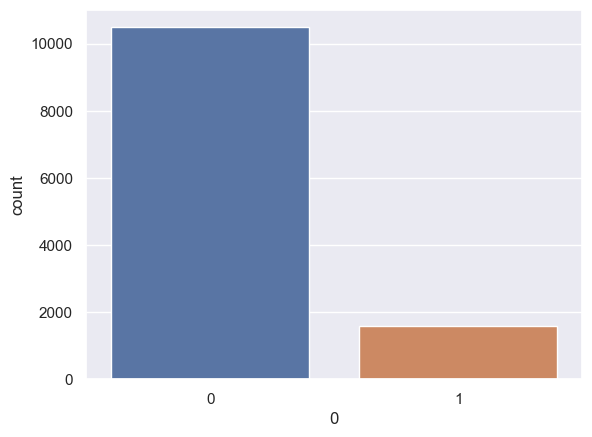

In [212]:
X = combined_4.drop('0', axis=1)
y = combined_4['0']

sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [213]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

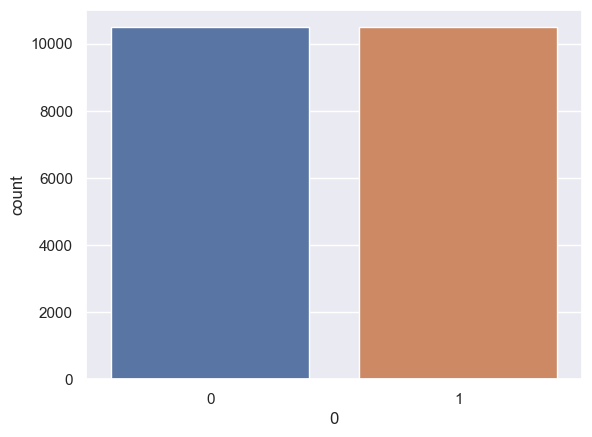

In [214]:
sb.countplot(data=pd.DataFrame(y), x='0')
plt.show()

In [215]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [217]:
rf = RandomForestClassifier(random_state=42)

params = {
    'n_estimators': [50 ,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2 ,5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

search = HalvingGridSearchCV(rf, params, scoring='f1', n_jobs=-1, verbose=2)

search.fit(X_train, y_train)

best_params = search.best_params_
best_estimator = search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 181
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 162
n_resources: 181
Fitting 5 folds for each of 162 candidates, totalling 810 fits
----------
iter: 1
n_candidates: 54
n_resources: 543
Fitting 5 folds for each of 54 candidates, totalling 270 fits
----------
iter: 2
n_candidates: 18
n_resources: 1629
Fitting 5 folds for each of 18 candidates, totalling 90 fits
----------
iter: 3
n_candidates: 6
n_resources: 4887
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 4
n_candidates: 2
n_resources: 14661
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best estimator found:  RandomForestClassifier(n_estimators=200, random_state=42)


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9890336935791482
Precision: 0.979874213836478
Recall: 0.9983979493752002
F1-Score: 0.9890493572448817
Sensitivity: 0.9983979493752002
Specificity: 0.9798170923998738


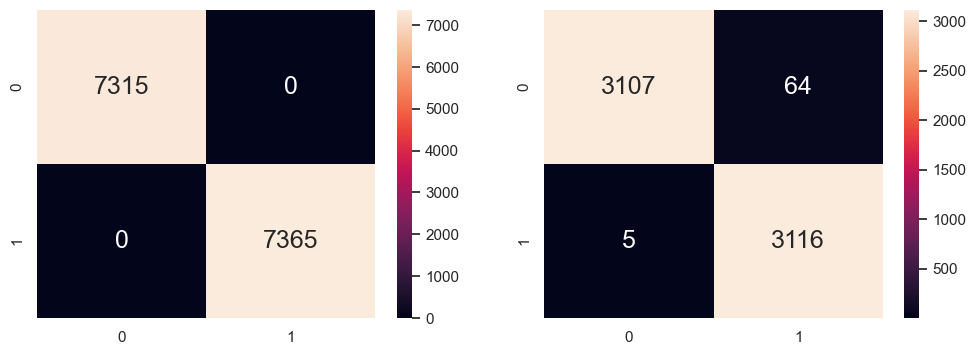

In [218]:
rf_y_train_pred = search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, rf_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, rf_y_train_pred))
print('Precision:', precision_score(y_train, rf_y_train_pred))
print('Recall:', recall_score(y_train, rf_y_train_pred))
print('F1-Score:', f1_score(y_train, rf_y_train_pred))

rf_train_acc=accuracy_score(y_train, rf_y_train_pred)
rf_train_pre=precision_score(y_train, rf_y_train_pred)
rf_train_rec=recall_score(y_train, rf_y_train_pred)
rf_train_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()


rf_y_test_pred = search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, rf_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, rf_y_test_pred))
print('Precision:', precision_score(y_test, rf_y_test_pred))
print('Recall:', recall_score(y_test, rf_y_test_pred))
print('F1-Score:', f1_score(y_test, rf_y_test_pred))

rf_test_acc=accuracy_score(y_train, rf_y_train_pred)
rf_test_pre=precision_score(y_train, rf_y_train_pred)
rf_test_rec=recall_score(y_train, rf_y_train_pred)
rf_test_f1=f1_score(y_train, rf_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, rf_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, rf_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [219]:
getsize(search)

10419923

In [82]:
joblib.dump(search, r"C:\Users\Admin\Desktop\Models\rf_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\rf_new_model_3.joblib']

In [220]:
dt = DecisionTreeClassifier()

param_grid = {
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = HalvingGridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1, scoring='f1')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print('Best parameters found: ', best_params)
print('Best estimator found: ', best_estimator)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 543
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 543
Fitting 5 folds for each of 72 candidates, totalling 360 fits
----------
iter: 1
n_candidates: 24
n_resources: 1629
Fitting 5 folds for each of 24 candidates, totalling 120 fits
----------
iter: 2
n_candidates: 8
n_resources: 4887
Fitting 5 folds for each of 8 candidates, totalling 40 fits
----------
iter: 3
n_candidates: 3
n_resources: 14661
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier()


For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9772727272727273
Precision: 0.9676507537688442
Recall: 0.987183595001602
F1-Score: 0.977319587628866
Sensitivity: 0.987183595001602
Specificity: 0.967518133081047



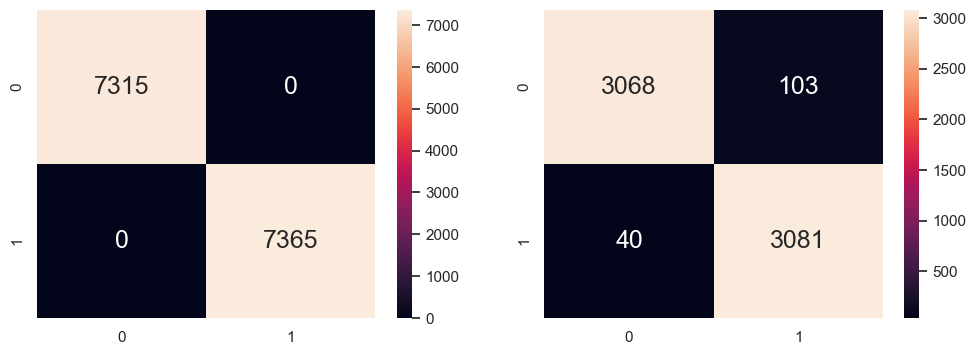

In [221]:
dt_y_train_pred = grid_search.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, dt_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, dt_y_train_pred))
print('Precision:', precision_score(y_train, dt_y_train_pred))
print('Recall:', recall_score(y_train, dt_y_train_pred))
print('F1-Score:', f1_score(y_train, dt_y_train_pred))

rf_train_acc=accuracy_score(y_train, dt_y_train_pred)
rf_train_pre=precision_score(y_train, dt_y_train_pred)
rf_train_rec=recall_score(y_train, dt_y_train_pred)
rf_train_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

dt_y_test_pred = grid_search.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, dt_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, dt_y_test_pred))
print('Precision:', precision_score(y_test, dt_y_test_pred))
print('Recall:', recall_score(y_test, dt_y_test_pred))
print('F1-Score:', f1_score(y_test, dt_y_test_pred))

rf_test_acc=accuracy_score(y_train, dt_y_train_pred)
rf_test_pre=precision_score(y_train, dt_y_train_pred)
rf_test_rec=recall_score(y_train, dt_y_train_pred)
rf_test_f1=f1_score(y_train, dt_y_train_pred)

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, dt_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, dt_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [222]:
getsize(grid_search)

68209

In [86]:
joblib.dump(grid_search, r"C:\Users\Admin\Desktop\Models\dt_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\dt_new_model_3.joblib']

In [223]:
lgbm = LGBMClassifier()
parameters = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [6, 8, 10, 12, 14, 16, 18, 20, None],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1],
}

hgs = HalvingGridSearchCV(lgbm, parameters, cv=5, scoring='f1', n_jobs=-1, verbose=2)

best_lgm_model = hgs.fit(X_train, y_train)

print('Best parameters:', best_lgm_model.best_params_)

n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 20
max_resources_: 14680
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 972
n_resources: 20
Fitting 5 folds for each of 972 candidates, totalling 4860 fits
----------
iter: 1
n_candidates: 324
n_resources: 60
Fitting 5 folds for each of 324 candidates, totalling 1620 fits
----------
iter: 2
n_candidates: 108
n_resources: 180
Fitting 5 folds for each of 108 candidates, totalling 540 fits
----------
iter: 3
n_candidates: 36
n_resources: 540
Fitting 5 folds for each of 36 candidates, totalling 180 fits
----------
iter: 4
n_candidates: 12
n_resources: 1620
Fitting 5 folds for each of 12 candidates, totalling 60 fits
----------
iter: 5
n_candidates: 4
n_resources: 4860
Fitting 5 folds for each of 4 candidates, totalling 20 fits
----------
iter: 6
n_candidates: 2
n_resources: 14580
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'colsample_bytree': 0.7, 'l

For Training Data:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Sensitivity: 1.0
Specificity: 1.0

For Test Data:
Accuracy: 0.9903051493960585
Precision: 0.9820415879017014
Recall: 0.9987183595001602
F1-Score: 0.9903097696584591
Sensitivity: 0.9987183595001602
Specificity: 0.9820245979186376



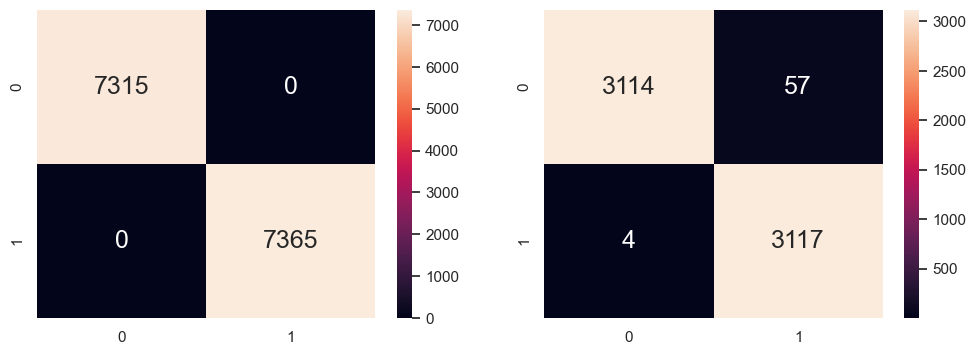

In [224]:
lgbm_y_train_pred = best_lgm_model.predict(X_train)

tn, fp, fn, tp = confusion_matrix(y_train, lgbm_y_train_pred).ravel()

print("For Training Data:")
print('Accuracy:', accuracy_score(y_train, lgbm_y_train_pred))
print('Precision:', precision_score(y_train, lgbm_y_train_pred))
print('Recall:', recall_score(y_train, lgbm_y_train_pred))
print('F1-Score:', f1_score(y_train, lgbm_y_train_pred))

# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

lgbm_y_test_pred = best_lgm_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, lgbm_y_test_pred).ravel()

print("For Test Data:")
print('Accuracy:', accuracy_score(y_test, lgbm_y_test_pred))
print('Precision:', precision_score(y_test, lgbm_y_test_pred))
print('Recall:', recall_score(y_test, lgbm_y_test_pred))
print('F1-Score:', f1_score(y_test, lgbm_y_test_pred))


# Calculate Sensitivity
sensitivity = tp / (tp + fn)

# Calculate Specificity
specificity = tn / (tn + fp)

print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print()

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, lgbm_y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, lgbm_y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
plt.show()

In [225]:
getsize(best_lgm_model)

1030183

In [90]:
joblib.dump(best_lgm_model, r"C:\Users\Admin\Desktop\Models\lgm_new_model_3.joblib")

['C:\\Users\\Admin\\Desktop\\Models\\lgm_new_model_3.joblib']